# PyTorch Lesson 3


Things we will learn in this lesson:

    - forward pass caluclation using hand written code
    - forward pass using inbuilt method Linear()
    - pytorch custom module creation for simple linear regression
    - optimization algorithm -Batch Gradient descent
    - Stochastic Gradient Descent
    - Mini- Batch gradient Descent
    - Simple Linear regrssion using inbuilt pytorch loss and optim functions

In [183]:
import torch

# Forward pass method
**Lets  define a function by our self say y = wx+b **

where, x is the input variable 
       w is the weight/slope 
       b is the bias/y-intercept
        
**Now lets calculate the value of y for x = 1.0, w=2.0 and b=-1.0 using torch functions as practise**

In [184]:
def forward(weight, bias, input_x):
    y = bias + (weight*input_x)
    return y

In [185]:
#Weight & bias tensors are initialized 
#(requires_grad is set True for variable which are to be learned/updated during model building)

w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

x= torch.tensor([1.0])
yhat = forward(w, b, x)


print('The value of yhat is:', yhat)

The value of yhat is: tensor([1.], grad_fn=<AddBackward0>)


**Now lets do the same for a set of input rows sent to the "Foraward method"**

This would result in a linear function applied to every row of the input and the outputs are calculated by boradcasting the values

In [186]:
x = torch.tensor([[1],[3]])

yhat = forward(w, b, x)

print('The output of yhat with input x:', yhat)

The output of yhat with input x: tensor([[1],
        [5]], grad_fn=<AddBackward0>)


# Linear() inbuilt method for Forward calculation
### PYTORCH has made our lives easy by providng all these linear caluclations handy through the 'class Linear' in package torch.nn

**Lets make use of Linear method from torch.nn to calculate the value of an output for a randomly set weight and bias**

In [187]:
from torch.nn import Linear

In [188]:
torch.manual_seed(42)
model = Linear(in_features=1, out_features=1)

** *'model' object of 'Linear' class shows,* **

the weight/slope as first parameter 0.7645
the bisas as second parameter 0.8300

In [189]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [190]:
print("Python dictionary: ",model.state_dict())
print("keys: ",model.state_dict().keys())
print("values: ",model.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.7645]])), ('bias', tensor([0.8300]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.7645]]), tensor([0.8300])])


Thus the object 'model' of class linear, avoids us to write a seperate method called forward and explicitly send their paramters

In [53]:
x = torch.tensor([3.0])

yhat = model(x)
print('The value of yhat is:', yhat)

The value of yhat is: tensor([3.1236], grad_fn=<AddBackward0>)


# Customer Module for Linear Regression using Linear()
#### Now we are comfortable using the  in-built pytorch 'Linear' class for performing the forward pass calculation.

Lets move ahead and build a custom module for Linear regression as a whole (leveraging the in-built features like 'torch.nn.Linear')

**For building customer module we will use "torch.nn.Module"**

In [92]:
import torch.nn as nn

In [204]:
class Linear_Regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(Linear_Regression, self).__init__()
        self.Linear = nn.Linear(input_size, output_size)
        
    def forward_pass(self, input_x):
        return self.Linear(input_x)

In [94]:
#creating object 'model' for Linear_Regression class
model = Linear_Regression(1,1)

#State_dict is the default weights and bias initialized by the 'Linear' class
print("Python dictionary: ",model.state_dict())
print("keys: ",model.state_dict().keys())
print("values: ",model.state_dict().values())

Python dictionary:  OrderedDict([('Linear.weight', tensor([[-0.2343]])), ('Linear.bias', tensor([0.9186]))])
keys:  odict_keys(['Linear.weight', 'Linear.bias'])
values:  odict_values([tensor([[-0.2343]]), tensor([0.9186])])


In [96]:
x = torch.tensor([[1.], [5.]])

yhat = model.forward_pass(x)
print('The value of yhat is:', yhat)

The value of yhat is: tensor([[ 0.6843],
        [-0.2528]], grad_fn=<AddmmBackward>)


# Pytorch way of building simple Linear Regression

In [107]:
import matplotlib.pyplot as plt

Lets first define the forward pass function and MSE loss function

In [162]:
def forward(x):
    return w*x

def loss_mse(y,yhat):
    return torch.mean(y - yhat)**2

Initial value of weight is set to -10.0 and the input vector is also created

In [172]:
w = torch.tensor(-10.0, requires_grad=True)

# create a range of input value with .arange() function where 0.1 is the stepsize from -3 to 3(resulting in 60 elements). 
# View function creates transposes matrix from (1x60) to (60x1)
x = torch.arange(-3,3,0.1).view(-1,1)

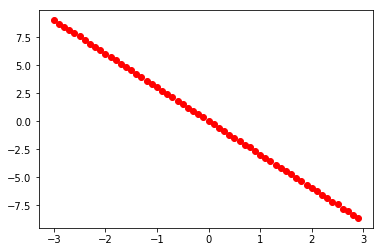

In [173]:
#Lets create the actual output y

f = -3*x

y = f + (0.1*torch.rand(x.size()))

plt.plot(x.numpy(),y.numpy(),'ro')
plt.show()

The below code iterates for 4 epochs,

i.e 1 epoch is equal to sending all input of x and calulating forward and backward pass(1 epoch = 1 update of weight w)

In each epoch, loss is calculated for 'w' weught output for every input of x using MSE. Partial diff is done using ".backward()"

weight 'w' is updated in successive steps with account to lr. 

#### Batch Gradient Descent

In [165]:
cost = []
for epoch in range(4):
    yhat = forward(x)
    loss = loss_mse(y,yhat)
    loss.backward()
    w.data = w.data - (0.1*w.grad.data)
    print(w.data)
    cost.append(loss.item())
    w.grad.data.zero_()

tensor(-9.9970)
tensor(-9.9940)
tensor(-9.9910)
tensor(-9.9881)


In [166]:
cost

[0.08915474265813828,
 0.08906543999910355,
 0.08897723257541656,
 0.08888784050941467]

The above method is called "BATCH GRADIENT DESCENT" since all the examples in the dataset is taken at once to calculate cost and backpropagate to 
optimize the weights

#### Stochastitc Gradient Descent

This method of optimizarion takes every individual sample and caluclates loss and then optimize it by partial differentiation

Hence the total number of iteration per epoch = total number of samples = total number of updates in weight w

In [ ]:
w = torch.tensor(-10.0, requires_grad=True)

# create a range of input value with .arange() function where 0.1 is the stepsize from -3 to 3(resulting in 60 elements). 
# View function creates transposes matrix from (1x60) to (60x1)
x = torch.arange(-3,3,0.1).view(-1,1)

#Lets create the actual output y

f = -3*x

y = f + (0.1*torch.rand(x.size()))

In [169]:
cost = []
total_loss = []
for epoch in range(4):
    total = 0
    for i in zip(x,y):
        yhat = forward(x)
        loss = loss_mse(y,yhat)
        loss.backward()
        w.data = w.data - (0.1*w.grad.data)
        #print(w.data)
        cost.append(loss.item())
        w.grad.data.zero_()
        total = total + loss.item() #total loss for the iteration
    total_loss.append # total loss for the epoch   
    print('Updated weight for epoch {} is {} with total loss of {}'.format(epoch, w.data, total))

Updated weight for epoch 0 is -9.821308135986328 with total loss of 5.322175860404968
Updated weight for epoch 1 is -9.647895812988281 with total loss of 5.01216085255146
Updated weight for epoch 2 is -9.47961139678955 with total loss of 4.720197334885597
Updated weight for epoch 3 is -9.316304206848145 with total loss of 4.445249117910862


#### Mini -Batch Gradient Descent

This method is similar to SGD but takes in bunches instaed of individual samples.

In [ ]:
w = torch.tensor(-10.0, requires_grad=True)

# create a range of input value with .arange() function where 0.1 is the stepsize from -3 to 3(resulting in 60 elements). 
# View function creates transposes matrix from (1x60) to (60x1)
x = torch.arange(-3,3,0.1).view(-1,1)

#Lets create the actual output y

f = -3*x

y = f + (0.1*torch.rand(x.size()))

In [174]:
cost = []
total_loss = []
bs = 3
for epoch in range(4):
    total = 0
    start = 0
    batch_size = bs
    for i in range(batch_size):
        x_ = x[start:batch_size]
        y_ = y[start:batch_size]
        yhat = forward(x_)
        loss = loss_mse(y_,yhat)
        loss.backward()
        w.data = w.data - (0.1*w.grad.data)
        #print(w.data)
        cost.append(loss.item())
        w.grad.data.zero_()
        total = total + loss.item() #total loss for the iteration
        start = batch_size
        batch_size = batch_size + bs
    total_loss.append # total loss for the epoch   
    print('Updated weight for epoch {} is {} with total loss of {}'.format(epoch, w.data, total))

Updated weight for epoch 0 is -2.91878604888916 with total loss of 581.586856842041
Updated weight for epoch 1 is -3.017382860183716 with total loss of 0.07656095642596483
Updated weight for epoch 2 is -3.016010046005249 with total loss of 0.008780610223766416
Updated weight for epoch 3 is -3.016029119491577 with total loss of 0.008141433470882475


# Optim function to automate optimization

In [195]:
from torch import nn,optim

In [196]:
loss_mse = nn.MSELoss()

In [205]:
model = Linear_Regression(1,1)
print(model.state_dict())
optimizer = optim.SGD(model.parameters(), lr=0.01)

OrderedDict([('Linear.weight', tensor([[-0.2751]])), ('Linear.bias', tensor([-0.3833]))])


In [206]:
# create a range of input value with .arange() function where 0.1 is the stepsize from -3 to 3(resulting in 60 elements). 
# View function creates transposes matrix from (1x60) to (60x1)
x = torch.arange(-3,3,0.1).view(-1,1)

#Lets create the actual output y

f = -3*x

y = f + (0.1*torch.rand(x.size()))

In [214]:
cost = []
total_loss = []
for epoch in range(4):
    total = 0
    for i in zip(x,y):
        yhat = model.forward_pass(i[0])
        loss = loss_mse(y,yhat)
        optimizer.zero_grad()
        loss.backward()
        total = total + loss.item()
        optimizer.step() #this method update the weights w based on diff values from loss.backward() under the hood
    print("The total loss for epoch {} is {} with parameters {}".format(epoch,total,optimizer.state_dict()))

The total loss for epoch 0 is 1617.740312576294 with parameters {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2487013126288, 2487013128592]}]}
The total loss for epoch 1 is 1617.7398281097412 with parameters {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2487013126288, 2487013128592]}]}
The total loss for epoch 2 is 1617.7398204803467 with parameters {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2487013126288, 2487013128592]}]}
The total loss for epoch 3 is 1617.7398052215576 with parameters {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2487013126288, 2487013128592]}]}


Thus using nn module to select the required buit-in loss function and then optim function to select required optimization algorithm
